In [1]:
from context import bowman
from bowman.triangulation import Triangulation
from bowman.point_orbits import *

### Testing Code on Prym Eigenforms

Below find tests on the Prym eigenforms.

In [2]:
ronen44 = Triangulation.ronen_l(21)
veech_gens_list = ronen44.generators_veech.gens
print("Number of generators: ", len(veech_gens_list))

# find a veech group element that is the product of sheers, then raise to a power if needed.
veech_elem = veech_gens_list[1] * veech_gens_list[3]
veech_elem = veech_elem**2
veech_elem = veech_gens_list[7]
print("Veech element:\n", veech_elem)

Number of generators:  8
Veech element:
 [      -3*a - 13   -9/2*a - 31/2]
[13/10*a + 53/10         2*a + 6]


In [3]:
# compute the set of candidate periodic points.
candidate_points = set()
print("There are ", len(ronen44.triangles), " triangles in the table.")
for i in range(len(ronen44.triangles)):
    print("Computing for triangle ", i)
    tri_points = ronen44.compute_candidate_periodic_points(i, veech_elem)
    for point in tri_points:
        reformatted = (i, point)
        candidate_points.add(reformatted)

There are  6  triangles in the table.
Computing for triangle  0
Computing for triangle  1
Computing for triangle  2
Computing for triangle  3
Computing for triangle  4
Computing for triangle  5


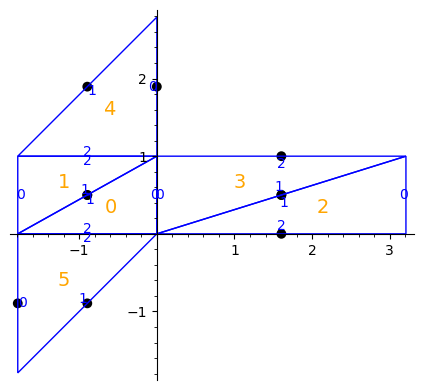

The preserved points are  {(4, (0, 1/2, 1/2)), (0, (0, 1/2, 1/2)), (5, (1/2, 1/2, 0)), (2, (0, 1/2, 1/2)), (3, (0, 1/2, 1/2)), (5, (0, 1/2, 1/2)), (2, (1/2, 0, 1/2)), (4, (1/2, 1/2, 0)), (1, (0, 1/2, 1/2)), (3, (1/2, 0, 1/2))}


In [4]:
# Now use the collection of candidate periodic points and the generators to find the periodic points
def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

# this block runs the algorithm on all elements of the veech generators list to reduce to periodic points.
preserved_pts = reduce_periodic_points(ronen44, candidate_points, veech_gens_list)
mark_points(ronen44, preserved_pts).plot().show()
print("The preserved points are ", preserved_pts)